# Support vector machines for classification

In [1]:
import logging

# Set up logging
logging.basicConfig(filename='svm.log', level=logging.INFO,
                    format="%(asctime)s:%(levelname)s:%(message)s", filemode='w')



In [2]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

logging.info('importing neccessary libraries')

In [3]:
X = np.random.randn(2000, 10)
y = X[:, 0] + X[:, 1] > 1

logging.info('Loading the data')

In [4]:
# Convert the numpy arrays to a pandas DataFrame
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df['Target'] = y

# Save the DataFrame to an Excel file
df.to_excel('data.xlsx', index=False)

logging.info('Data saved to Excel format')

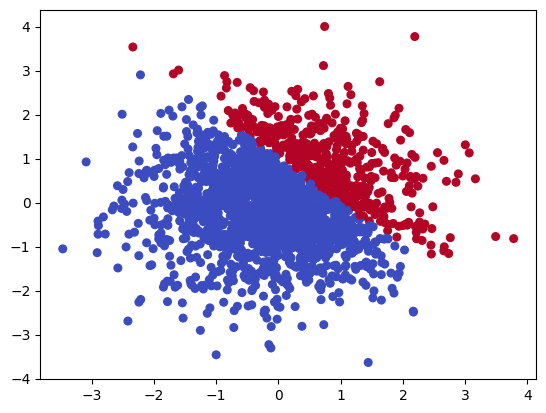

In [5]:
# Display the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.show()

logging.info('Show the data')

In [21]:
# Check the shape of the data
print(X.shape)

(2000, 10)


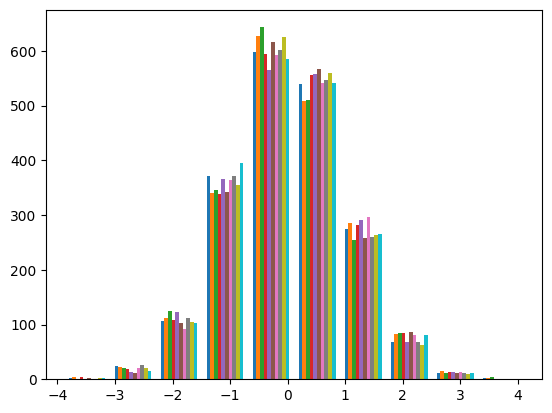

In [7]:
# visualize the distribution of the data
plt.hist(X)
plt.show()

logging.info('distribution of data')

In [8]:
# Build the SVM model
model = svm.SVC(kernel='linear')

logging.info('Svm Model Building')

In [9]:
logging.info('Training the model')

In [10]:
# Train the model
model.fit(X, y)


SVC(kernel='linear')

In [11]:
# Print the model score
print("Model score: {:.3f}".format(model.score(X, y)))

Model score: 0.996


In [14]:
# Predict the labels
y_pred = model.predict(X)

# Print the classification report
print(sklearn.metrics.classification_report(y, y_pred))

logging.info('predict the labels and display classification report')

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1548
        True       1.00      0.98      0.99       452

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [15]:
def plot_decision_function_10features(est, X, y, feature_names=None):
    """
    Plots the decision function of an SVM model for 10 features.
    
    Parameters:
    - est: The trained SVM model
    - X: Feature matrix (should have 10 features)
    - y: Target labels
    - feature_names: List of feature names (optional)

    Returns:
    - fig, axes: The figure and axes objects
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Ensure X has 10 features
    assert X.shape[1] == 10, "X must have exactly 10 features."
    
    # If feature names are not provided, generate default ones
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(10)]
    
    # Create a 2x5 grid of subplots
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.ravel()  # Flatten the axes array for easier indexing

    # Loop over feature pairs and plot decision function
    for i in range(10):
        # Select two features at a time (using cyclic pairing)
        f1, f2 = i, (i + 1) % 10  # Wrap around after last feature
        X_subset = X[:, [f1, f2]]  # Extract only 2 features
        
        # Generate a grid in the feature space
        xx, yy = np.meshgrid(np.linspace(X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1, 100),
                             np.linspace(X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1, 100))
        
        # Train the model on the selected feature subset
        est.fit(X_subset, y)
        
        # Evaluate decision function on the grid
        Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot the decision boundary
        axes[i].contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.6)
        axes[i].contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # Decision boundary
        
        # Scatter plot of points
        scatter = axes[i].scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap="coolwarm", edgecolors='k')
        
        # Label axes
        axes[i].set_xlabel(feature_names[f1])
        axes[i].set_ylabel(feature_names[f2])
        axes[i].set_title(f"Decision Boundary: {feature_names[f1]} vs {feature_names[f2]}")
    
    plt.tight_layout()
    return fig, axes


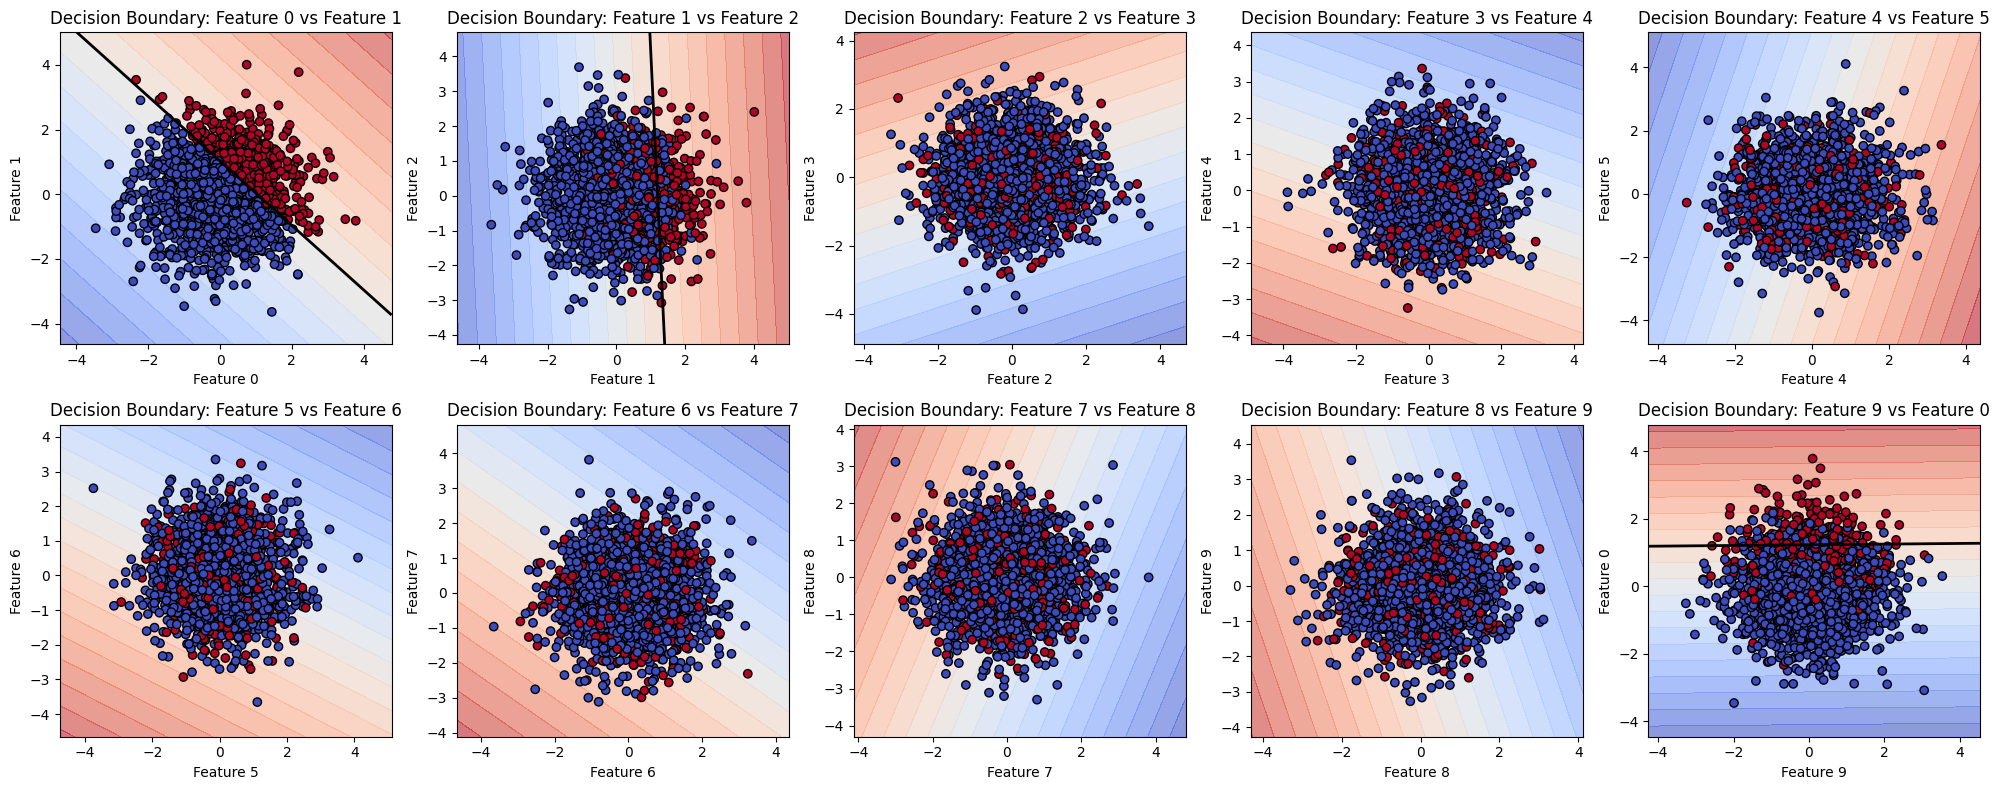

In [16]:
# Plot the decision function
fig, axes = plot_decision_function_10features(model, X, y)

logging.info('Plot the decision fuction ')